<a href="https://colab.research.google.com/github/juel-123/Mobile_price_prediction.ipynb/blob/main/Mobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Importing libraries*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#*Importing Dataset*

In [3]:
#importing the dataset
df = pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')


In [4]:
# head of the dataset
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# tail of the dataset
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
# shape of the dataset
df.shape

(2000, 21)

There are 2000 rows and 21 columns

In [7]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

##*Data description*

*The given features description:*




*  battery_power :Battery acpacvity in mAh
*  blue	 : Has Bluetooth or not
* clock_speed : Speed at which microprocessor executes instructions
* dual_sim  :Has dual sim support or not
* fc :Front camera megapixel
* four_g : Has 4G or not
* int_memory :Internal memory capacity
* m_dep : Mobile depth in cm
* mobile_wt  :Weight of mobile phones
* n_cores  : Nuber of cores in processor
* pc  :Primary camera in megapixels
* px_height  :Pixel resolution height
* px_width : Pixel resolution width
* ram  :Random access memory in MB
* sc_h  :screen height
* sc_w  :screen width
* talk_time : Longest that a single memory last over a call
* three_g  :Has 3G or not
* touch_screen : Touch screen or not
* wifi :Has wifi or not
* price_range :This is the target variable with value 0 (low cost),1(medium cost),2(high cost),3(very high cost)





###*Checking whether the data is  clean or not*

In [8]:
# checking the duplicate data
df[df.duplicated].sum()

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

There are no duplicated values in the dataset

In [9]:
# checking the null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values in the Dataset

###*Statistical Information*

In [10]:
# getting statistical  information of the features
df.describe(include = 'all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


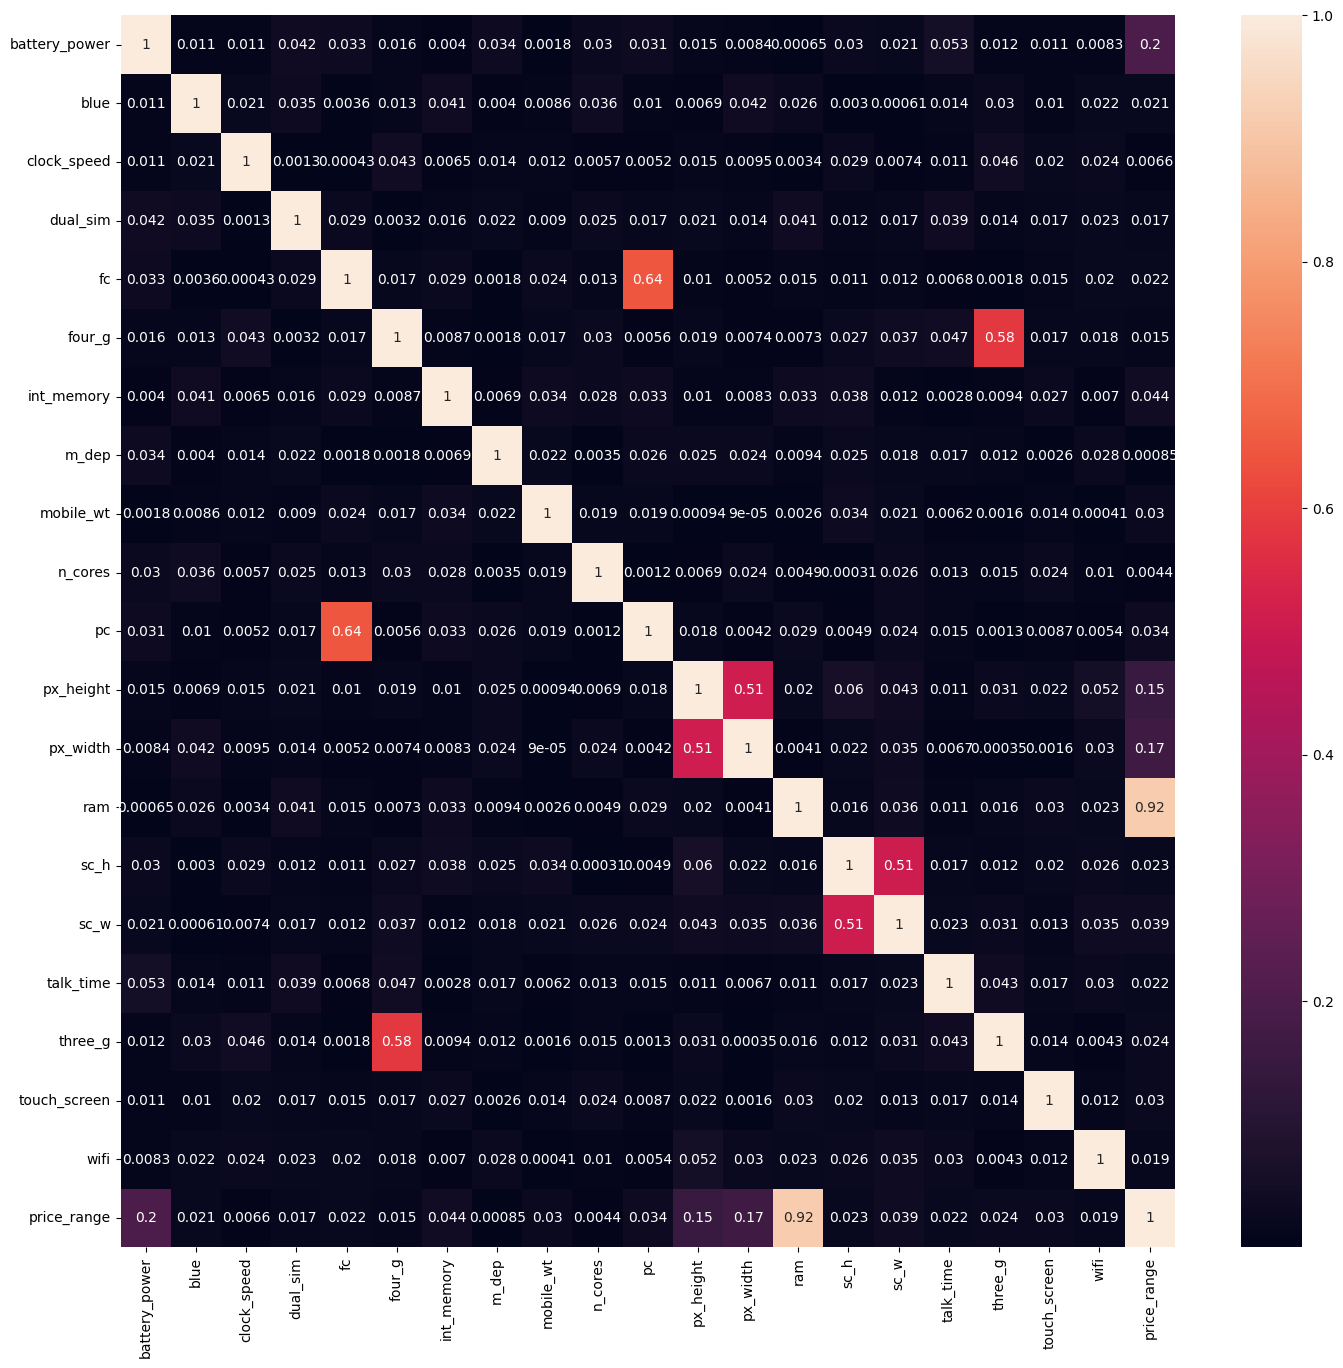

In [11]:
#  Let's see the correlation of each feature
correlation =  df.corr()
plt.figure(figsize=(17,16))
sns.heatmap(abs(correlation),annot=True)
plt.show()

Here after seeing Heat map,The correlation of independent features are not that highly correlated with each other which would lead to multicollinearity, which can affect the performance and interpretability of our model.

In [12]:
#  columns in the dataset
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
#no.of unique features
for i in df.columns:
  unique_count = df[i].nunique()
  print(f"The number of items in '{i}':{unique_count}")



The number of items in 'battery_power':1094
The number of items in 'blue':2
The number of items in 'clock_speed':26
The number of items in 'dual_sim':2
The number of items in 'fc':20
The number of items in 'four_g':2
The number of items in 'int_memory':63
The number of items in 'm_dep':10
The number of items in 'mobile_wt':121
The number of items in 'n_cores':8
The number of items in 'pc':21
The number of items in 'px_height':1137
The number of items in 'px_width':1109
The number of items in 'ram':1562
The number of items in 'sc_h':15
The number of items in 'sc_w':19
The number of items in 'talk_time':19
The number of items in 'three_g':2
The number of items in 'touch_screen':2
The number of items in 'wifi':2
The number of items in 'price_range':4


###*Visualization of Dependent variable*

In [14]:
# dependent feature
dependent_feature=['price_range']

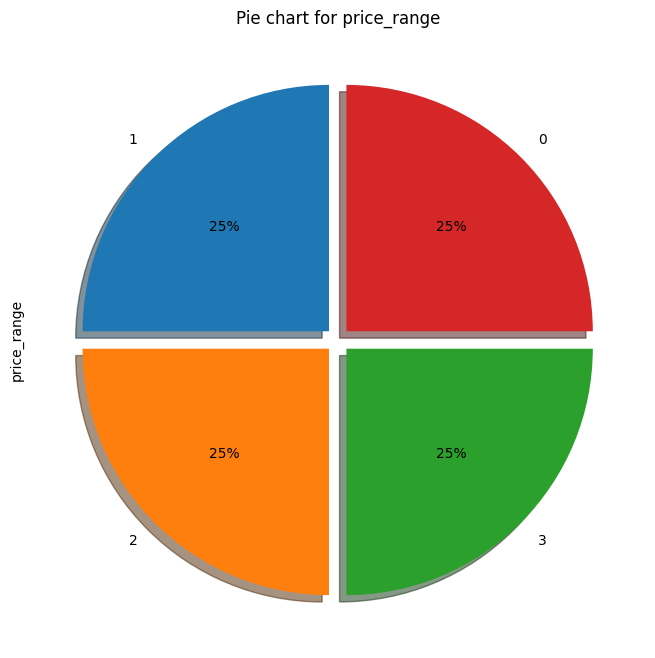

In [34]:
df['price_range'].value_counts().plot.pie(explode = [0.05,0.05,0.05,0.05],autopct= '%d%%', startangle= 90, shadow = True, figsize=(8,8))
plt.title('Pie chart for price_range')
plt.show()

In [16]:
x = pd.DataFrame(df.groupby('price_range').count())
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
1,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
2,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
3,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500


The count of each item in 'price_range' is 500

###*Relation between price_range and battery_power*

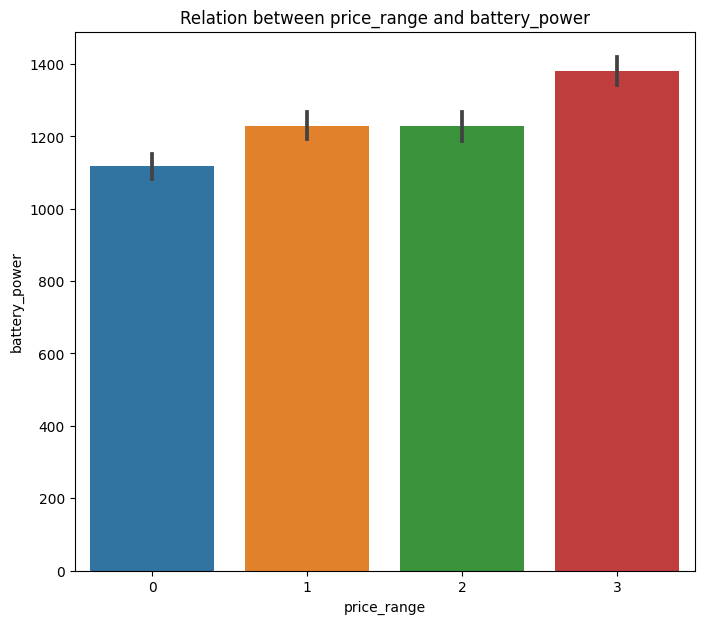

In [17]:
# visualizing price_range and battery power
plt.figure(figsize=(8,7))
sns.barplot(x= df['price_range'] ,y= df['battery_power'], data=df)
plt.xlabel('price_range')
plt.ylabel('battery_power')
plt.title('Relation between price_range and battery_power')
plt.show()

From the visualization we can infer that price_range having (0) has the lowest battery life and the price_range having (3) has the highest battery life.

###*Relation between px_width,px_height and price_range*

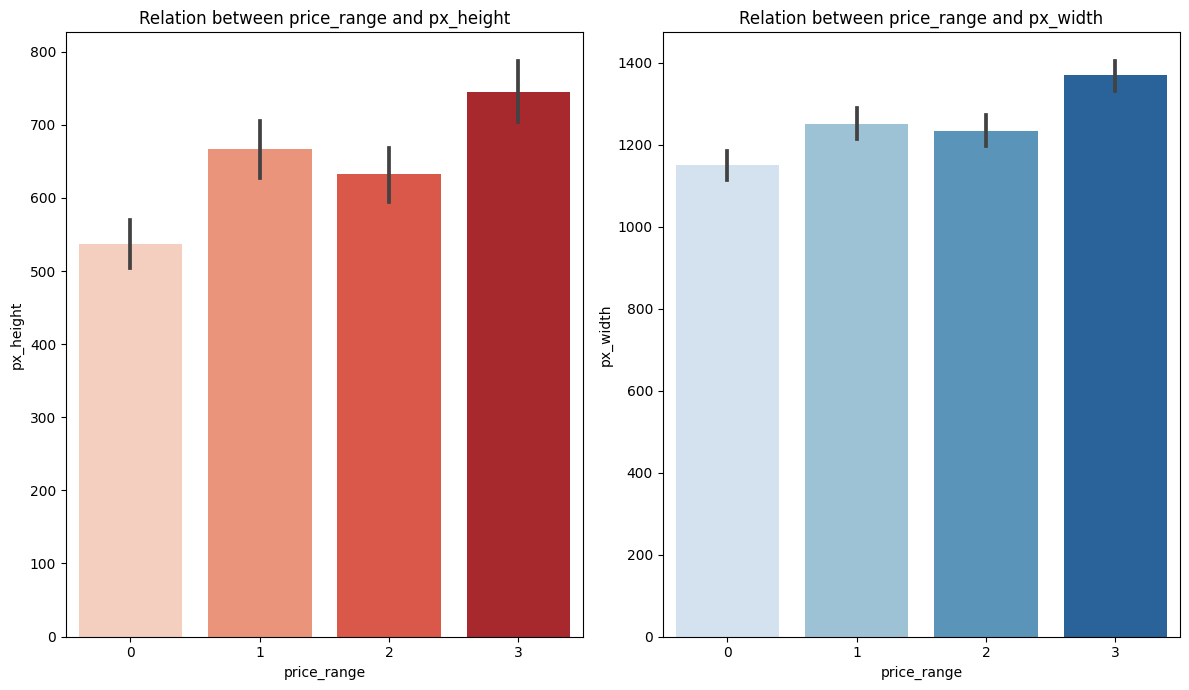

In [18]:
# visualizing Relation between px_width,px_height and price_range
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.barplot(x= 'price_range',y='px_height',data  =df,palette='Reds')
plt.xlabel('price_range')
plt.ylabel('px_height')
plt.title('Relation between price_range and px_height')
plt.subplot(1,2,2)
sns.barplot(x= 'price_range',y='px_width',data=df,palette='Blues')
plt.xlabel('price_range')
plt.ylabel('px_width')
plt.title('Relation between price_range and px_width')
plt.tight_layout()
plt.show()




*   In case of pixel  resolution height(px_height): The price_range(0) has the lowest px_height and the price_range(3) has highest px_height.
    
*   In case of pixel  resolution width(px_width): The price_range(0) has the lowest px_width and the price_range(3) has highest px_width.



###*Relation between price_range and ram*

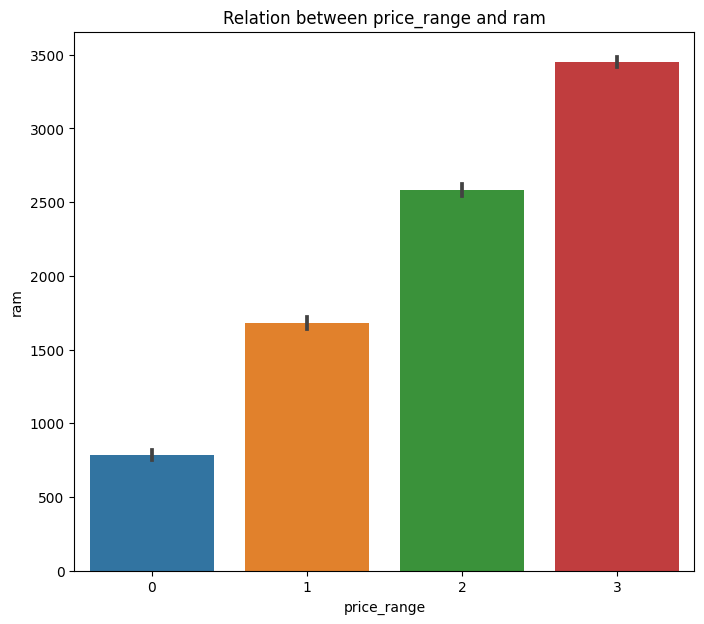

In [19]:
#visualizing relation between price_range and ram
plt.figure(figsize=(8,7))
sns.barplot(x= df['price_range'] ,y= df['ram'], data=df)
plt.xlabel('price_range')
plt.ylabel('ram')
plt.title('Relation between price_range and ram')
plt.show()


From the above visualization we can infer that as the price_range is increasing the ram also increasing.

###*Relation between price_range and 3G/4G*

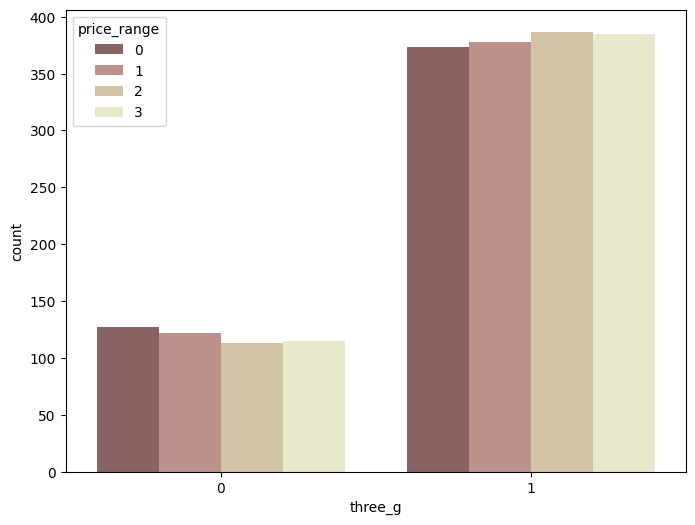

In [20]:
#visualizing three_g column
plt.figure(figsize= (8,6))
sns.countplot(x=df['three_g'], hue = df['price_range'],palette='pink')
plt.show()


  From the visualization we can infer that

* Low cost price_range mobiles are more that are not having three_g feature  
* High cost price_range mobiles are more that are having three_g feature




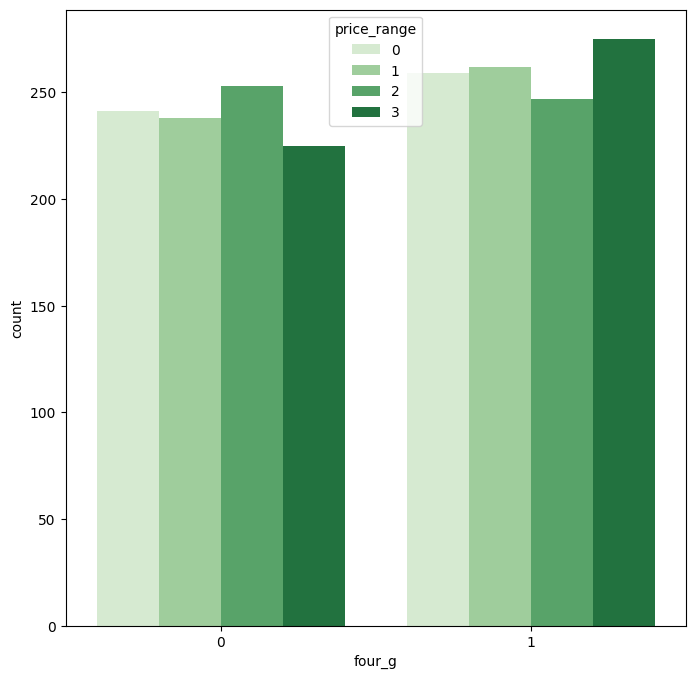

In [21]:
#visualizing four_g column
plt.figure(figsize= (8,8))
sns.countplot(x=df['four_g'], hue = df['price_range'],palette='Greens')
plt.show()

From the visualization we can infer that



*  High cost price_range mobiles are more that are not having three_g feature
*  Very High cost price_range mobiles are more that are having three_g feature




###*Relation between price_range , dual_sim and internal memory*

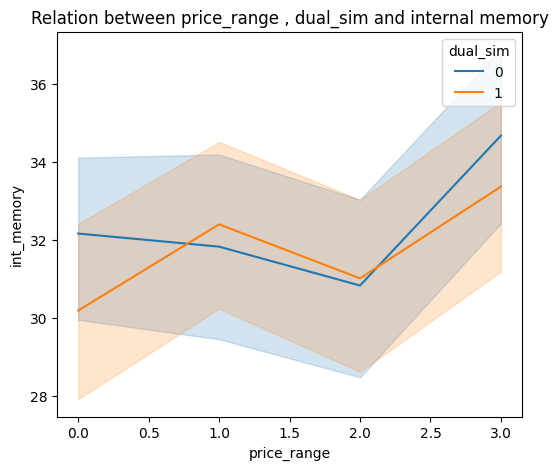

In [23]:
#Relation between price_range , dual_sim and internal memory
plt.figure(figsize=(6,5))
sns.lineplot(x=  'price_range',y = 'int_memory',hue='dual_sim', data=df)
plt.title('Relation between price_range , dual_sim and internal memory')
plt.show()

From the above visualization we can infer that:


*   Mobile of low cost supporting dual sim has less internal memory storage and mobile of very high cost supporting dual sim has more internal storage memory.
*   Mobile of high cost that not supporting dual sim has less internal memory storage and mobile of very high cost that not supporting dual sim has more internal storage memory than the mobile supporting dual sim



###*Relation between primary camera megapixel and front camera megapixel*

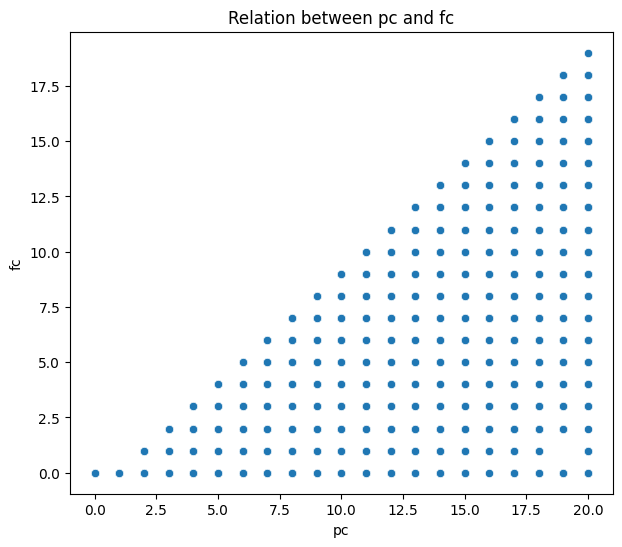

In [24]:
# Relation between pc and fc
plt.figure(figsize=(7,6))
sns.scatterplot(x = 'pc',y='fc',data =df)
plt.title('Relation between pc and fc')
plt.show()

From the above visualization we can infer that as primary megapixel increases the front camera megapixel also increases.

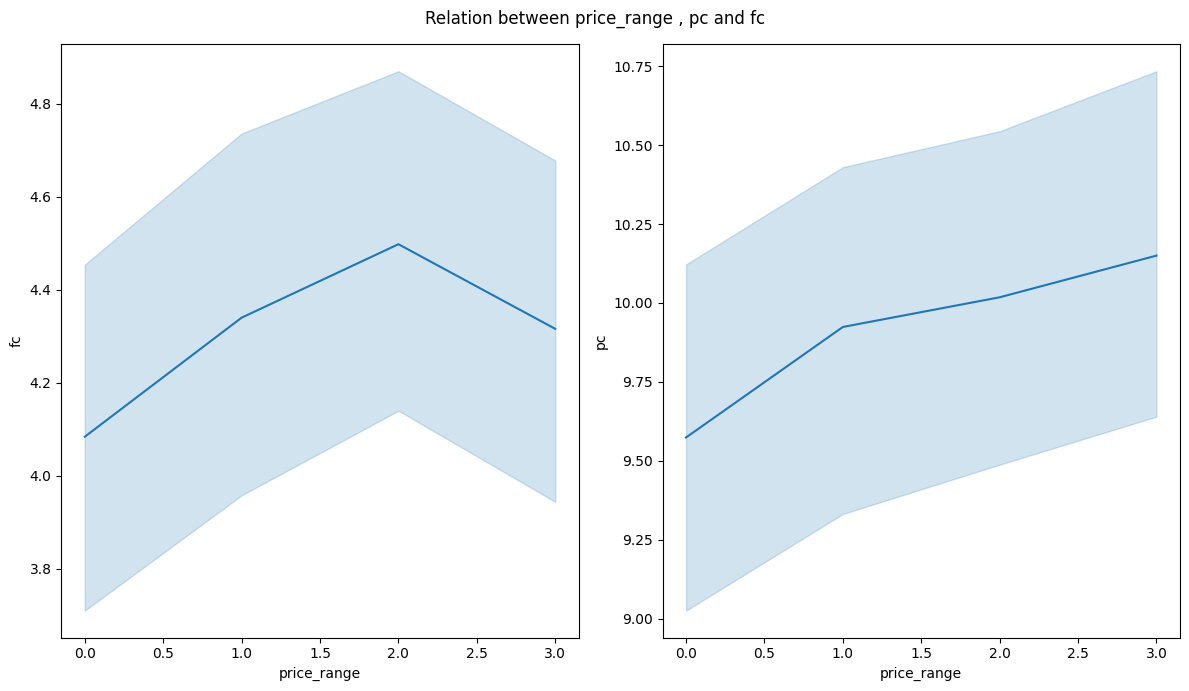

In [32]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.lineplot(x = 'price_range',y='fc',data =df)

plt.subplot(1,2,2)
sns.lineplot(x = 'price_range',y='pc',data =df)
plt.suptitle('Relation between price_range , pc and fc')
plt.tight_layout()
plt.show()

From the above visualization we can infer that:


*   Mobile of high price range has the highest front camera megapixels.
*   Mobile of very high price range has the highest primary camera megapixels.
*   low price range mobile have both less pc and less fc






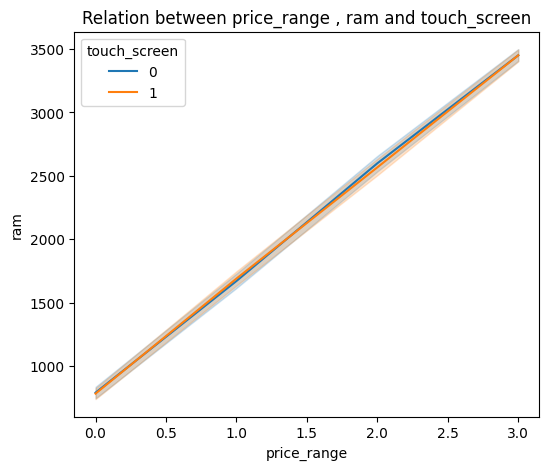

In [36]:
plt.figure(figsize=(6,5))
sns.lineplot(x=  'price_range',y = 'ram',hue='touch_screen', data=df)
plt.title('Relation between price_range , ram and touch_screen')
plt.show()

From the above visualization we can infer that as the price_range increases the ram also increases in case of both mobile having touch_screen or not.